In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('BigMart.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [7]:
for x in ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']:
    print(f"Minumum value of {x} is ",df[x].min(),f"Maximum value of {x} is ",df[x].max())

Minumum value of Item_Weight is  4.555 Maximum value of Item_Weight is  21.35
Minumum value of Item_Visibility is  0.0 Maximum value of Item_Visibility is  0.328390948
Minumum value of Item_MRP is  31.29 Maximum value of Item_MRP is  266.8884
Minumum value of Outlet_Establishment_Year is  1985 Maximum value of Outlet_Establishment_Year is  2009
Minumum value of Item_Outlet_Sales is  33.29 Maximum value of Item_Outlet_Sales is  13086.9648


In [8]:
df['Item_Outlet_Sales'].min(),df['Item_Outlet_Sales'].max()

(33.29, 13086.9648)

In [9]:
# get unique values and value counts of categorical column
for x in ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    print(f"Value count of {x} are:\n",df[x].value_counts(),'\n')

#df["Outlet_Type"].value_counts()

Value count of Item_Fat_Content are:
 Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Value count of Item_Type are:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

Value count of Outlet_Identifier are:
 OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Value count of Outlet_Size are:
 Medium    2793
Small     2388
High       932
Nam

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# Dropping iteam identifier as  it wont be of much use
#df.drop('Item_Identifier',axis=1,inplace=True)

In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# to get details of Dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [15]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([5089.,    0., 2889.,    0.,    0.,  112.,    0.,  316.,    0.,
         117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

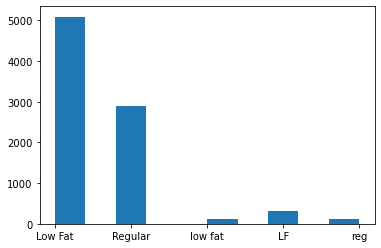

In [16]:
plt.hist(df["Item_Fat_Content"])

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

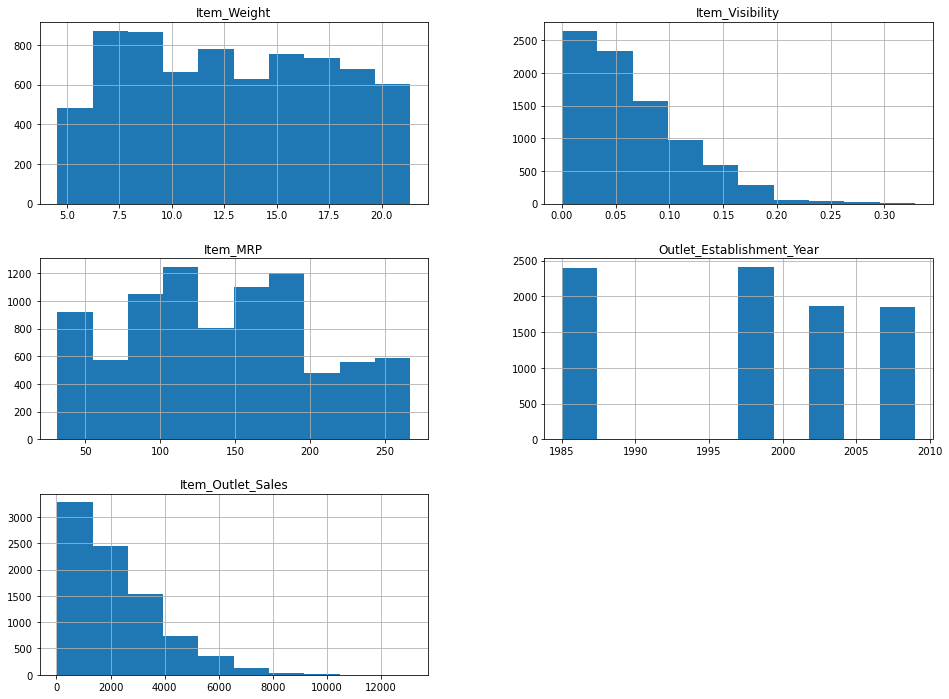

In [17]:
df.hist(figsize=(16,12))

In [18]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [19]:
#df[(df['Outlet_Size'] == 'Small') & (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Supermarket Type3')].shape[0]

In [20]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Missing value imputation

In [21]:
# if data is normally distributed -> use mean to impute numerical missing value
# if data is skewed or have outliers -> use median to impute numerical missing value
# here item_weigh is not normally distributed so we will use median 

In [22]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [23]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [24]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [25]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [28]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [29]:
df[(df["Outlet_Identifier"] == 'OUT027')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.6,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.6,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.6,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.6,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.6,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.6,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,12.6,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,12.6,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.6,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [30]:
df[(df["Outlet_Identifier"] == 'OUT027')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.6,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.6,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.6,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.6,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.6,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614


In [31]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [32]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [33]:
# A specific Outlet_Identifier is assigned to each year
# From above 2 lines we can conclude that establishment year have 9 values while outlet identifier have 10.

In [34]:
a=df[df["Outlet_Identifier"] == 'OUT027']
a['Outlet_Establishment_Year'].value_counts()

1985    935
Name: Outlet_Establishment_Year, dtype: int64

In [35]:
a=df[df["Outlet_Identifier"] == 'OUT019']
a['Outlet_Establishment_Year'].value_counts()

1985    528
Name: Outlet_Establishment_Year, dtype: int64

In [36]:
# Year 1985 have 2 outlet_identifiers

In [37]:
df[df["Outlet_Identifier"] == 'OUT019'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,12.6,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.6,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,12.6,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,12.6,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,12.6,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,12.6,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,12.6,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,12.6,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,12.6,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [38]:
df[df["Outlet_Identifier"] == 'OUT027']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.6,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.6,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.6,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.6,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.6,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.6,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,12.6,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,12.6,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.6,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


In [39]:
# We can see both outlet identifeirs (out027 and out019) have different values for outlet size and outlet type
# We can delete Establishment year as we have same feature referred as Outlet_Identifier

In [40]:
#df.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [41]:
df.shape

(8523, 12)

## EDA

In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
# Numerical variable distribution 

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

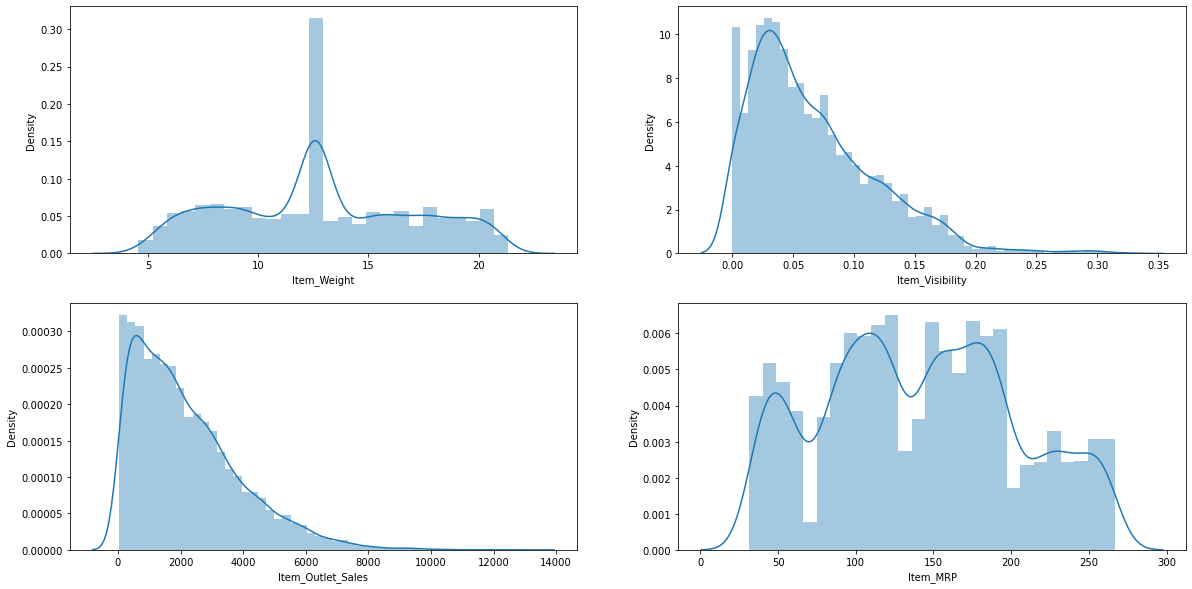

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
sns.distplot(df['Item_Weight'], ax=axs[0, 0])
sns.distplot(df['Item_Visibility'], ax=axs[0, 1])
sns.distplot(df['Item_Outlet_Sales'], ax=axs[1, 0])
sns.distplot(df['Item_MRP'], ax=axs[1, 1])


In [45]:
# For the data which is skewed we will use log transformation in data processing

<AxesSubplot:>

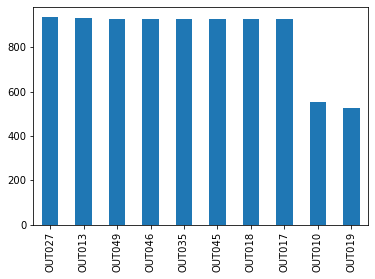

In [46]:
df.Outlet_Identifier.value_counts().plot(kind='bar')
#titanic.Sex.value_counts()

<AxesSubplot:>

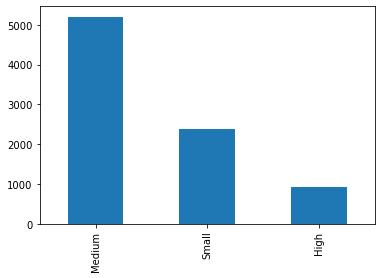

In [47]:
df.Outlet_Size.value_counts().plot(kind="bar")

<AxesSubplot:>

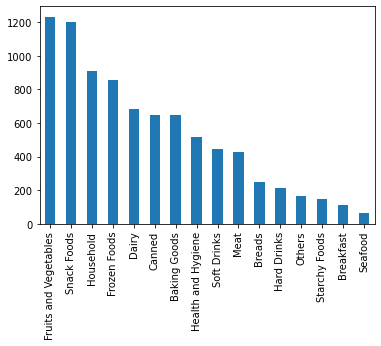

In [48]:
df.Item_Type.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

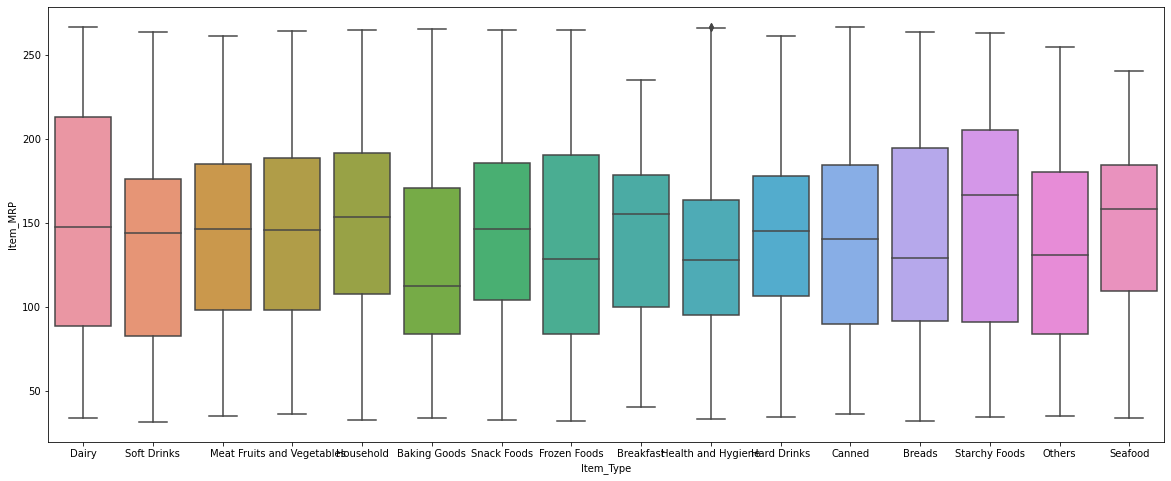

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Item_Type',y='Item_MRP',data=df)

<AxesSubplot:>

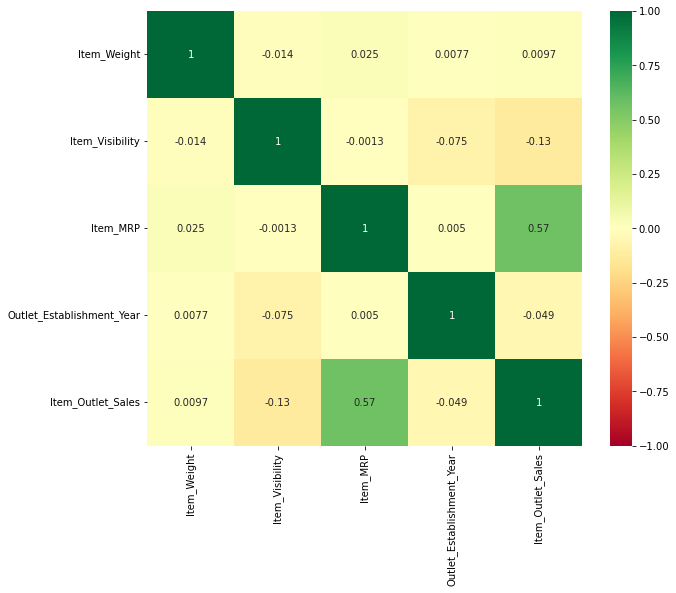

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square=True,vmin=-1,vmax=1,annot= True , cmap = 'RdYlGn')

In [51]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\VibeX\anaconda3\lib\si

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

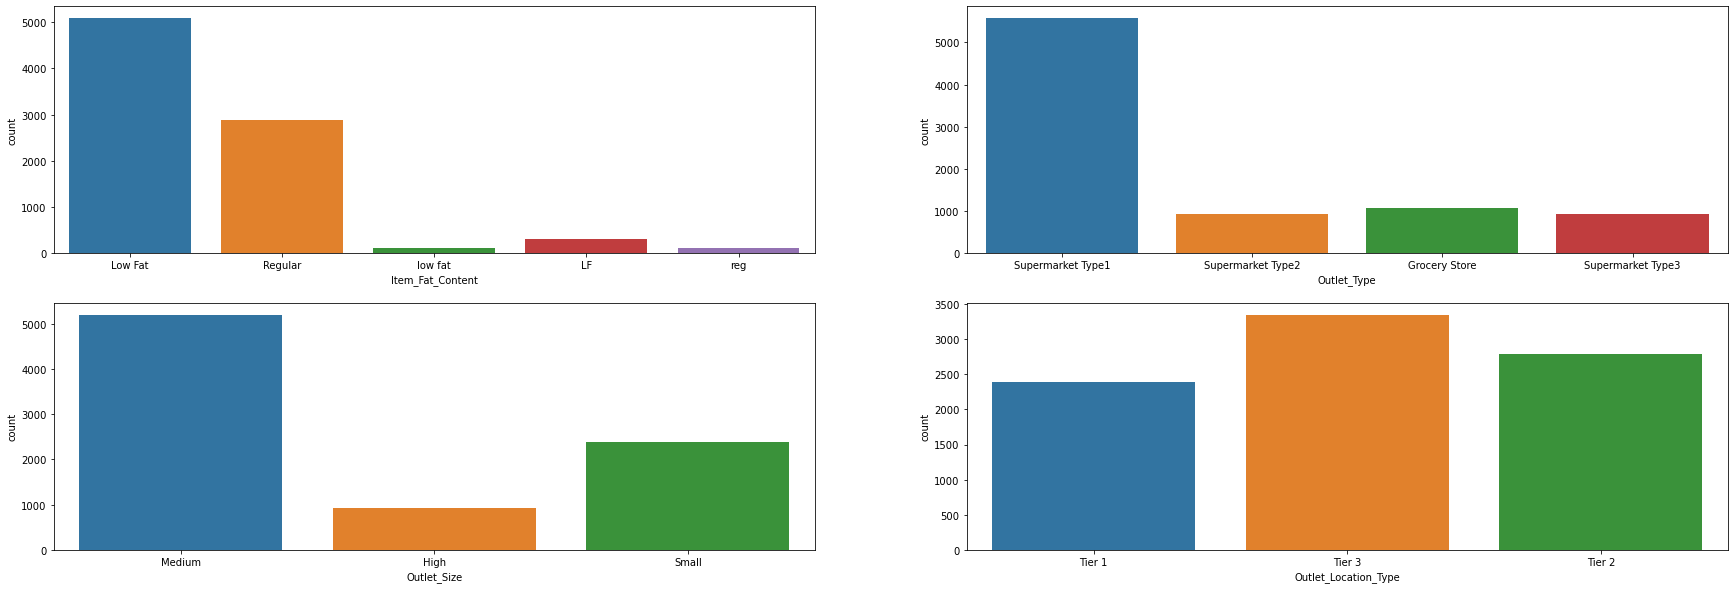

In [52]:
# Categorical Data Distribution
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
sns.countplot('Item_Fat_Content',data=df,ax=axs[0,0])
sns.countplot('Outlet_Type',data=df,ax=axs[0,1])
sns.countplot('Outlet_Size',data=df,ax=axs[1,0])
sns.countplot('Outlet_Location_Type',data=df,ax=axs[1,1])

In [53]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

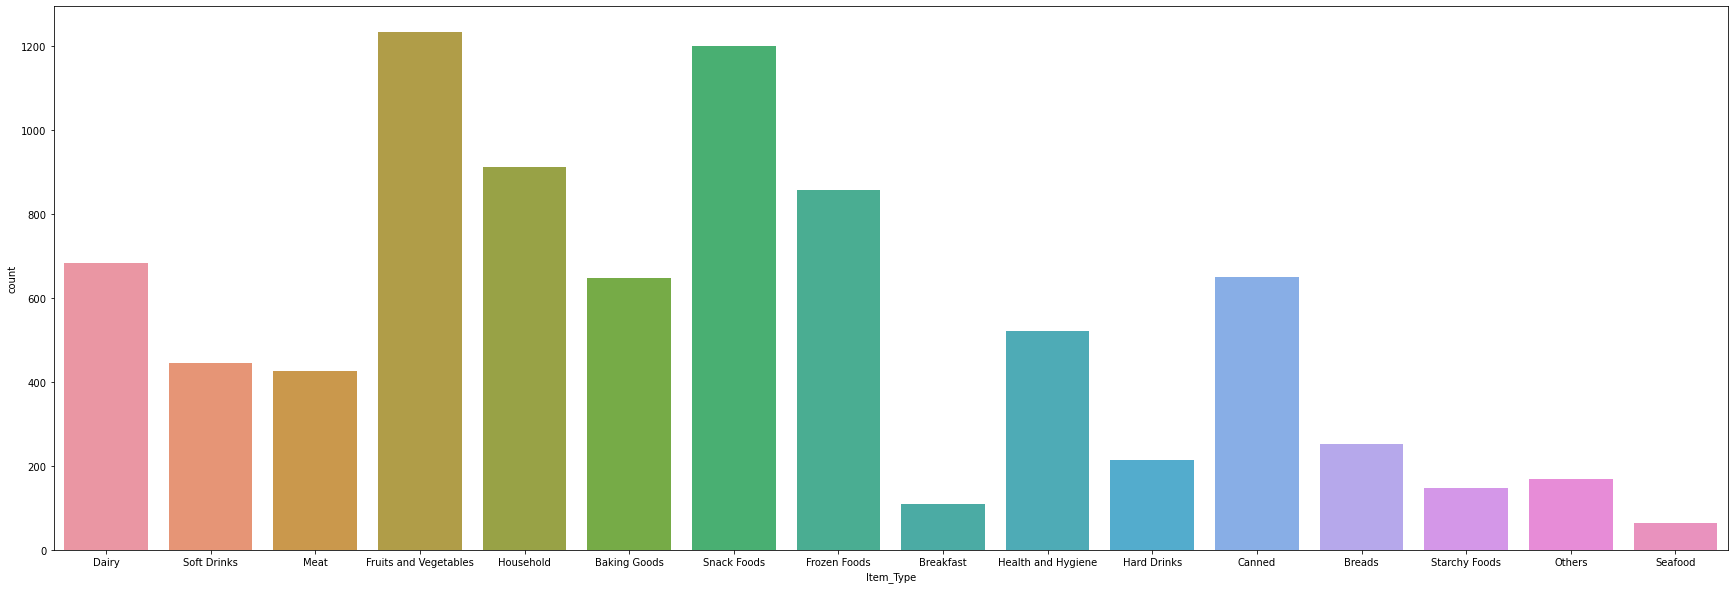

In [54]:
plt.figure(figsize=(30,10))
sns.countplot("Item_Type",data=df)

In [55]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [56]:
df['Item_Fat_Content'].value_counts().index

Index(['Low Fat', 'Regular', 'LF', 'reg', 'low fat'], dtype='object')

In [57]:
df.replace({'Item_Fat_Content':{"low fat":"Low Fat",'LF':'Low Fat',"reg":"Regular"}},inplace=True)

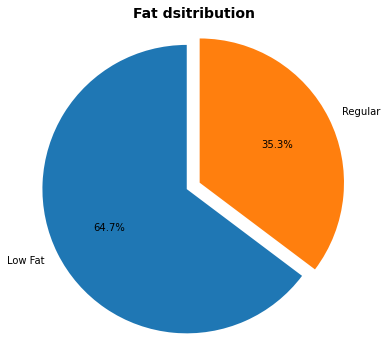

In [58]:
# Fat Distribution 
labels=df['Item_Fat_Content'].value_counts().index
plt.figure(figsize=(6, 6))
plt.title('Fat dsitribution', fontweight='bold', fontsize=14)
plt.pie(df['Item_Fat_Content'].value_counts(),explode=[0.05,0.05],labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


([<matplotlib.patches.Wedge at 0x203c5ebe100>,
 [Text(0.7717854848994881, 0.783803014346374, 'Fruits and Vegetables'),
  Text(-0.7798178439356501, 0.7758119168197625, 'Snack Foods'),
  Text(-0.9227946302922232, -0.5987069987095852, 'Household'),
  Text(0.15527185349768283, -1.0889860658022188, 'Frozen Foods'),
  Text(0.9956713162746483, -0.4675880985952372, 'Dairy')],
 [Text(0.42097390085426617, 0.4275289169162039, '25.2%'),
  Text(-0.4253551876012637, 0.42317013644714313, '24.6%'),
  Text(-0.5033425256139399, -0.32656745384159186, '18.6%'),
  Text(0.08469373827146334, -0.5939923995284829, '17.5%'),
  Text(0.5430934452407172, -0.2550480537792203, '14.0%')])

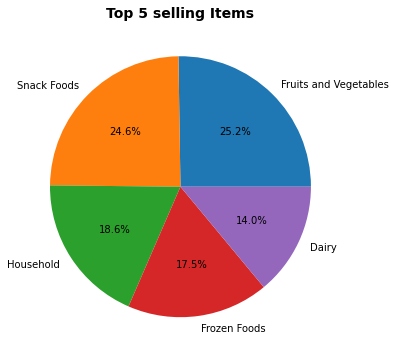

In [59]:
#Top selling item distribution
labels=df['Item_Type'].value_counts().index
item_type_vals=df['Item_Type'].value_counts()
plt.figure(figsize=(6,6))
plt.title("Top 5 selling Items",fontweight='bold',fontsize=14)
plt.pie(item_type_vals[:5],labels=labels[:5],autopct='%1.1f%%')

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


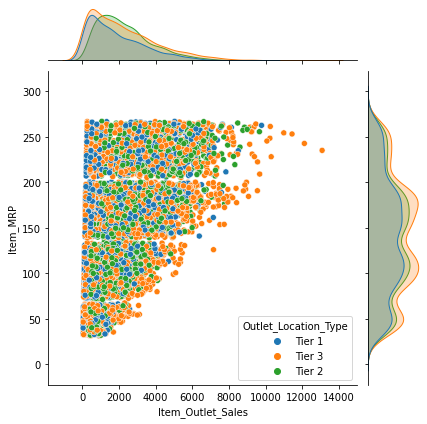

In [61]:
# outlet sales vs mrp
sns.jointplot(x='Item_Outlet_Sales',y='Item_MRP',hue='Outlet_Location_Type',data=df)

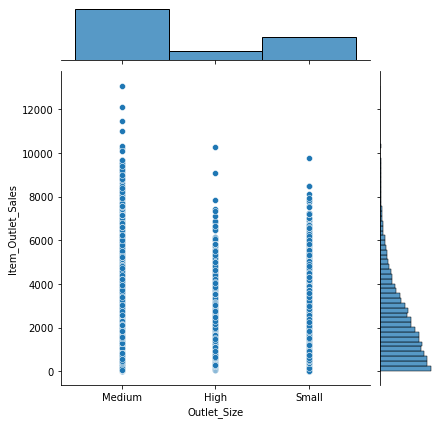

In [62]:
#Outlet size vs Sales
sns.jointplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

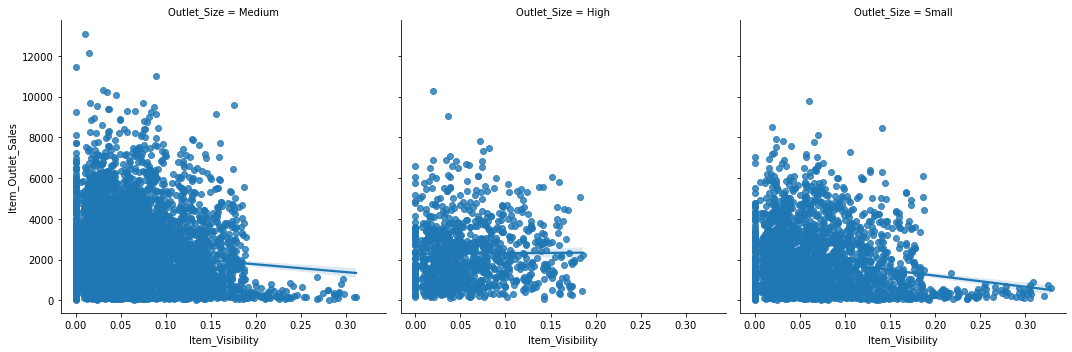

In [63]:
# item visibility vs sales -< according to outlet size
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',col='Outlet_Size',data=df)

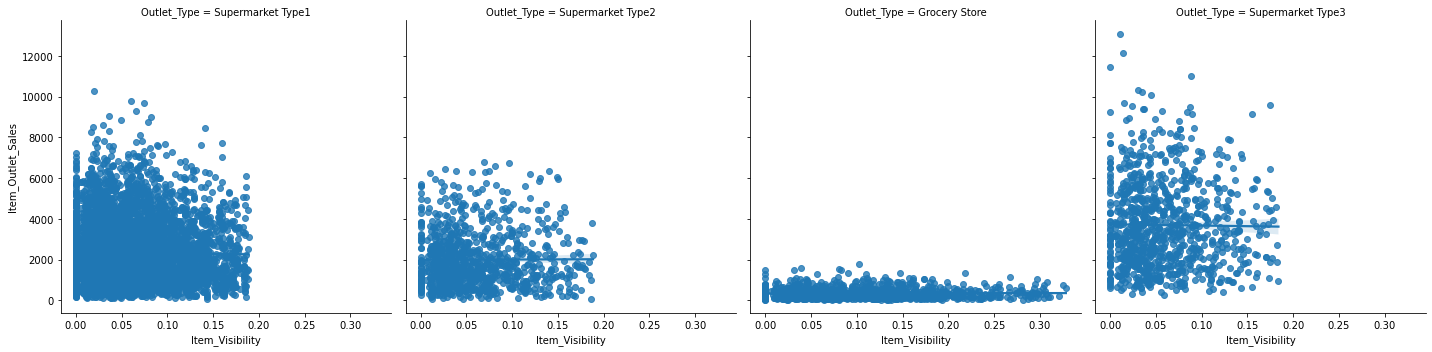

In [64]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',col='Outlet_Type',data=df)

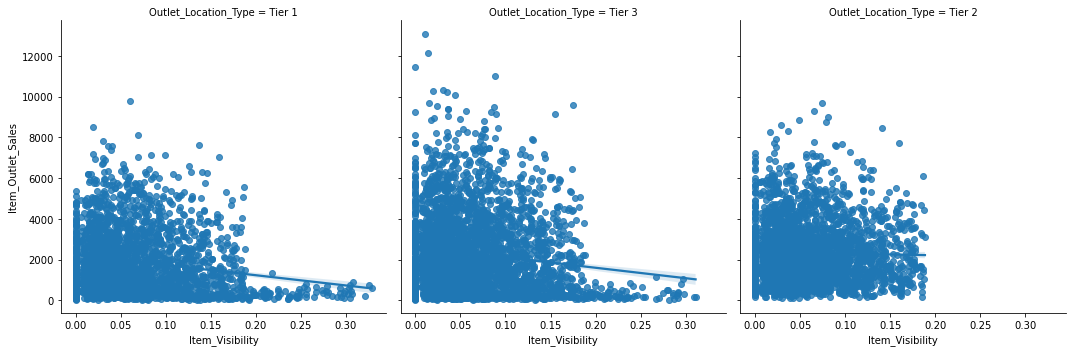

In [65]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',col='Outlet_Location_Type',data=df)

In [66]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


# Data PreProcessing

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
encoder = LabelEncoder()

In [69]:
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

In [70]:
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

<AxesSubplot:>

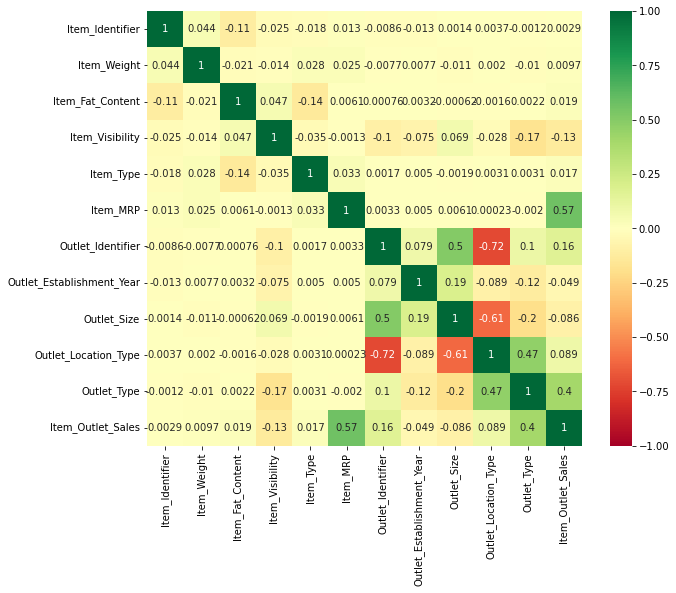

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),square=True,vmin=-1,vmax=1,annot= True , cmap = 'RdYlGn')

In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [73]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outlier detection

In [74]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

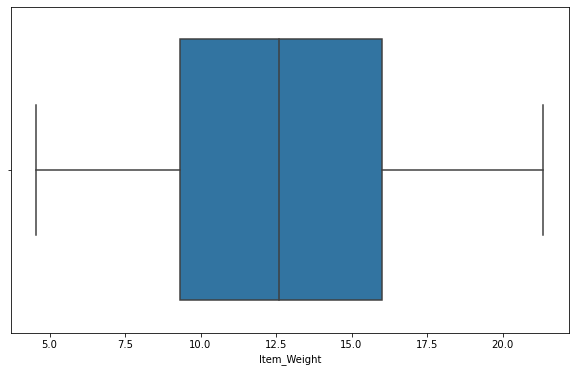

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Item_Weight'])

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

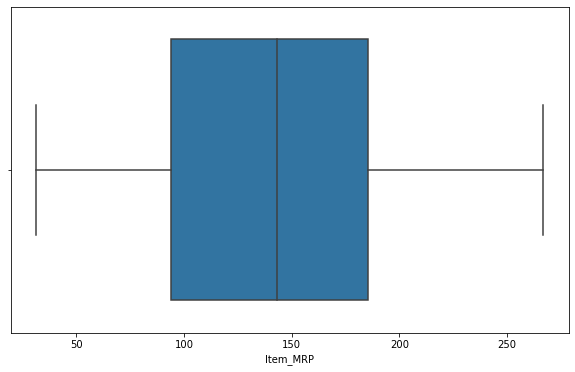

In [76]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Item_MRP'])

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

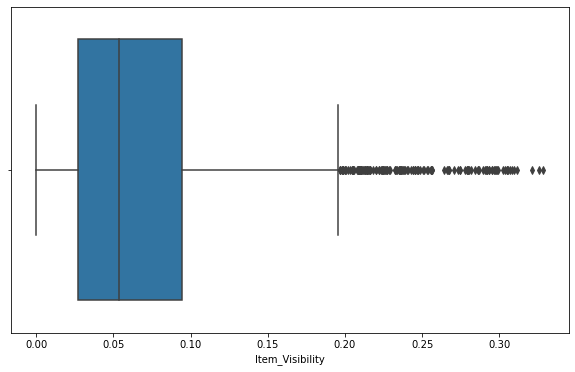

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Item_Visibility'])

In [78]:
per99 = np.percentile(df.Item_Visibility.values,99.9)

In [79]:
outlier_item_visibility=df[df['Item_Visibility']>per99]

In [80]:
a=outlier_item_visibility.index
for x in a:
    df = df.drop(df.index[x]).reset_index(drop=True)
    print(x)

854
1805
2855
3474
3750
4382
6622
7250
7603


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

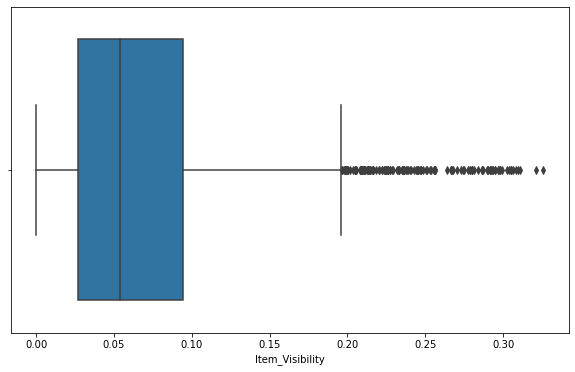

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Item_Visibility'])

In [82]:
df['Item_MRP_new']=np.log(df['Item_MRP'])
df['Item_Outlet_Sales_new'] = np.log(df["Item_Outlet_Sales"])
# To get the original value of item outlet sales, perform exponential transformation -> np.exp(value)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Item_Outlet_Sales_new', ylabel='Density'>

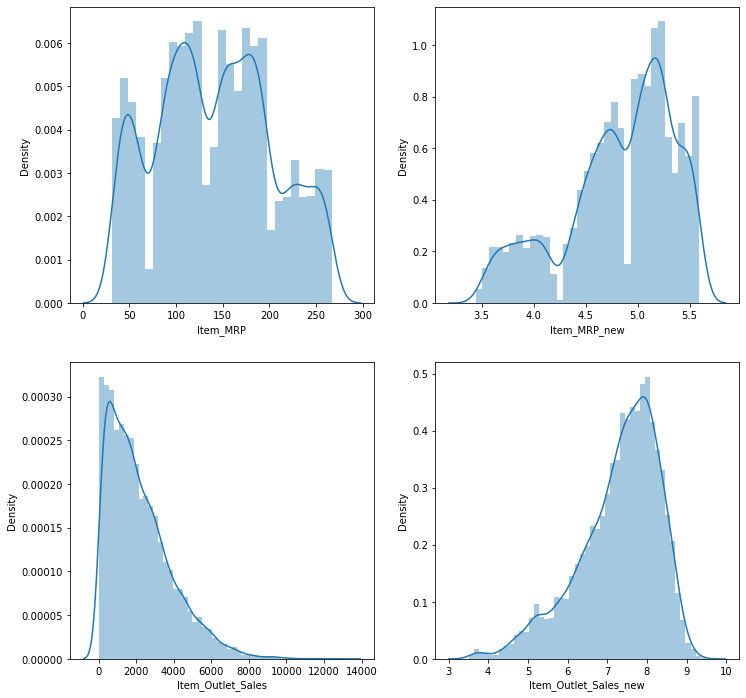

In [83]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,12))
sns.distplot(df['Item_MRP'],ax=axs[0,0])
sns.distplot(df['Item_MRP_new'],ax=axs[0,1])
sns.distplot(df['Item_Outlet_Sales'],ax=axs[1,0])
sns.distplot(df['Item_Outlet_Sales_new'],ax=axs[1,1])

In [84]:
df.drop(['Item_Outlet_Sales','Item_MRP'],inplace=True,axis=1)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

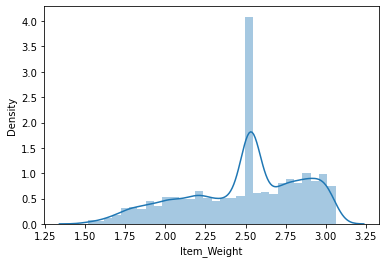

In [85]:
sns.distplot(np.log(df['Item_Weight']))

## Model Building

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X=df.drop(['Item_Outlet_Sales_new'],axis=1)
y=df['Item_Outlet_Sales_new']

In [88]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_MRP_new,Item_Outlet_Sales_new
0,156,9.300,0,0.016047,4,9,1999,1,0,1,5.520697,8.225540
1,8,5.920,1,0.019278,14,3,2009,1,2,2,3.876794,6.094524
2,662,17.500,0,0.016760,10,9,1999,1,0,1,4.953133,7.648392
3,1121,19.200,1,0.000000,6,0,1998,1,2,0,5.204529,6.596300
4,1297,8.930,0,0.000000,9,1,1987,0,2,1,3.986414,6.902446
...,...,...,...,...,...,...,...,...,...,...,...,...
8509,370,6.865,0,0.056783,13,1,1987,0,2,1,5.368411,7.929625
8510,897,8.380,1,0.046982,0,7,2002,1,1,1,4.683584,6.308617
8511,1357,10.600,0,0.035186,8,6,2004,2,1,1,4.444090,7.084322
8512,681,7.210,1,0.145221,13,3,2009,1,2,2,4.636021,7.520558


In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=200)

In [90]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [91]:
regressor = XGBRegressor()

In [92]:
model1=regressor.fit(X_train,y_train)

In [93]:
# Prediction on Train Data
predict = model1.predict(X_train)

r2= metrics.r2_score(y_train,predict)
print("R squared value is: ",round(r2*100,2))

mean_error=mean_squared_error(predict, y_train)
print("Mean squared error is: ",mean_error)

adj_r = (1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
print("Adjusted R value is: ",round(adj_r*100,2))

R squared value is:  90.61
Mean squared error is:  0.09618451212664937
Adjusted R value is:  90.6


In [94]:
# Prediction on validation data
test_predict = model1.predict(X_test)

r2= metrics.r2_score(y_test,test_predict)
print("R squared value is: ",round(r2*100,2))


mean_error=mean_squared_error(test_predict, y_test)
print("Mean squared error is: ",mean_error)


adj_r = (1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
print("Adjusted R value is: ",round(adj_r*100,2))

R squared value is:  70.69
Mean squared error is:  0.31024416995121756
Adjusted R value is:  70.65


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales_new', ylabel='Density'>

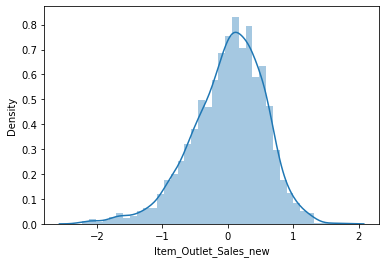

In [95]:
sns.distplot(y_test-test_predict)

In [96]:
print("Prediction max and min value VS Test max and min value")
np.exp(test_predict).min(),np.exp(test_predict).max(),np.exp(y_test).max(),np.exp(y_test).min()

Prediction max and min value VS Test max and min value


(43.0371, 8210.549, 13086.964800000003, 35.2874)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

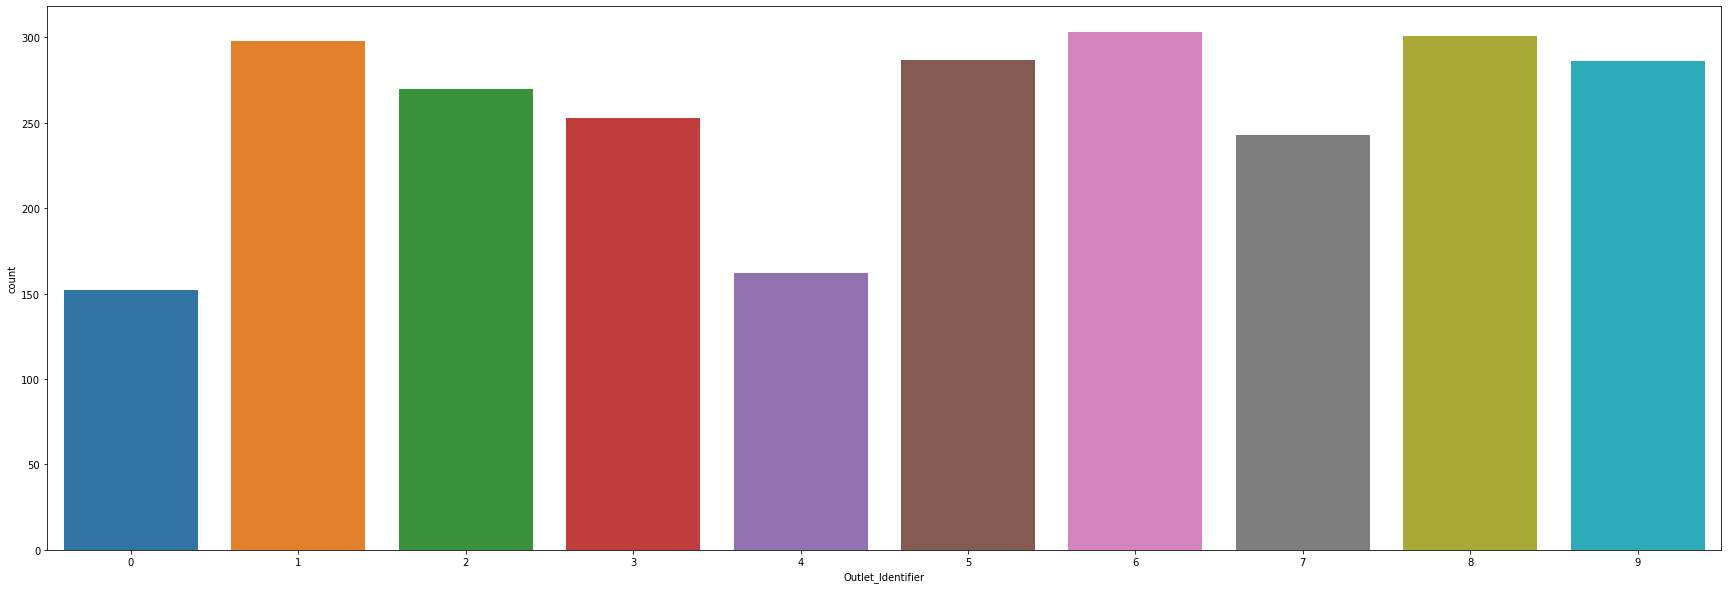

In [97]:
plt.figure(figsize=(30,10))
sns.countplot("Outlet_Identifier",data=X_test)

# Hyper Parameter Tunning

params= {'n_estimators': [int(x) for x in np.linspace(start = 50,stop=1000,num=10)],
         'max_depth':[int(x) for x in np.linspace(5, 20, num = 6)],
         'gamma':[1,2,4,6,10],
         'learning_rate':[0.15,0.20,0.25,0.30,0.35],
         'colsample_bytree':[0.20,0.25,0.30,0.35,0.40],
}
print(params)

In [98]:
params= {'n_estimators': [int(x) for x in np.linspace(start = 50,stop=1000,num=10)],
         'max_depth':[int(x) for x in np.linspace(5, 20, num = 6)],
         'gamma':[1,2,4,6,10],
         'learning_rate':[0.15,0.20,0.25,0.30,0.35],
         'colsample_bytree':[0.20,0.25,0.30,0.35,0.40],
}
print(params)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_depth': [5, 8, 11, 14, 17, 20], 'gamma': [1, 2, 4, 6, 10], 'learning_rate': [0.15, 0.2, 0.25, 0.3, 0.35], 'colsample_bytree': [0.2, 0.25, 0.3, 0.35, 0.4]}


In [99]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = params, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [101]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.4, gamma=10, learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=10, learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=10, learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=10, learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.4, gamma=10, learning_rate=0.2, max_depth=8, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.2, gamma=4, learning_rate=0.35, max_depth=11, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.2, gamma=4, learning_rate=0.35, max_depth=11, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.2, gamma=4, learning_rate=0.35, max_depth=11, n_estimators=50; total time=   0.0s
[CV] END colsample_bytree=0.2, gamma=4, learning_rate=0.35, max_

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.3000...
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
          

In [102]:
# Prediction on Train Data
predict = xg_random.predict(X_train)

print("Prediction on Training data\n")
r2= metrics.r2_score(y_train,predict)
print("R squared value is: ",round(r2*100,2))

mean_error=mean_squared_error(predict, y_train)
print("Mean squared error is: ",mean_error)

adj_r = (1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
print("Adjusted R value is: ",round(adj_r*100,2))

Prediction on Training data

R squared value is:  73.95
Mean squared error is:  0.26679697197059393
Adjusted R value is:  73.92


In [103]:
# Prediction on Validation data
test_predict = xg_random.predict(X_test)

print("Prediction on Validation data\n")

r2= metrics.r2_score(y_test,test_predict)
print("R squared value is: ",round(r2*100,2))


mean_error=mean_squared_error(test_predict, y_test)
print("Mean squared error is: ",mean_error)


adj_r = (1-((1-r2)*(len(y)-1))/(len(y)-X.shape[1]-1))
print("Adjusted R value is: ",round(adj_r*100,2))

Prediction on Validation data

R squared value is:  74.46
Mean squared error is:  0.2703359667687606
Adjusted R value is:  74.42


In [104]:
# Changing to reguler values of target and prediction
y_test = np.exp(y_test)
test_predict=np.exp(test_predict)

# Writing results in a specific format
results = X_test[['Item_Identifier', 'Outlet_Identifier']]

results['Prediction'] = test_predict

results


C:\Users\VibeX\AppData\Local\Temp\ipykernel_12540\277729307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Prediction'] = test_predict


,Item_Identifier,Outlet_Identifier,Prediction
1810,1147,9,1481.040894
7649,1317,5,1087.774902
5873,1271,5,3875.331055
1144,283,1,2516.427246
8228,1173,0,374.644196
...,...,...,...
5439,460,0,217.155106
6258,1384,9,532.627136
3439,505,7,1406.585571
8075,1414,5,2196.815674


In [105]:
results['Prediction'].max(),results['Prediction'].min(),y_test.min(),y_test.max()

(5114.99755859375, 71.20906829833984, 35.2874, 13086.964800000003)